In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\krn95\OneDrive\Desktop\Excel files\global_superstore_2016.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [4]:
print("Missing Values per COlumn : \n")
print(df.isnull().sum())

Missing Values per COlumn : 

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [5]:
df.drop(columns=['Postal Code'], inplace=True)

In [6]:
df['Row ID'] = df['Row ID'].astype(str)

In [7]:
print("Duplicates records are : ")
print(df.duplicated().sum())

Duplicates records are : 
0


In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns :")
print(numerical_columns)
print("Categorical Columns : ")
print(categorical_columns)

Numerical Columns :
['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
Categorical Columns : 
['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Order Priority']


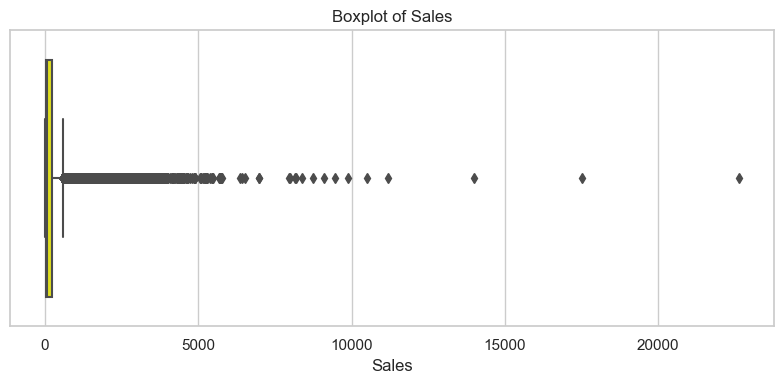

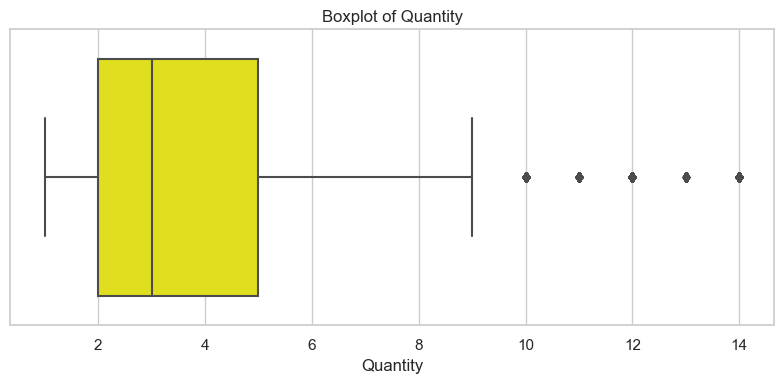

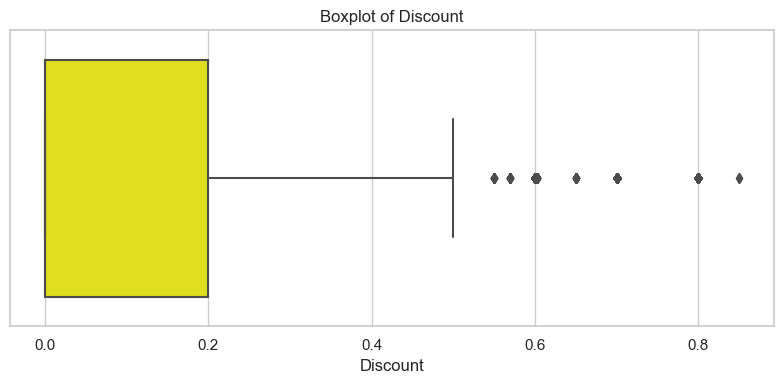

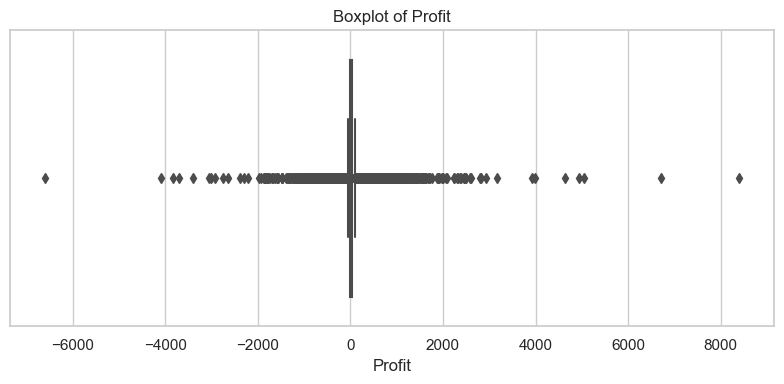

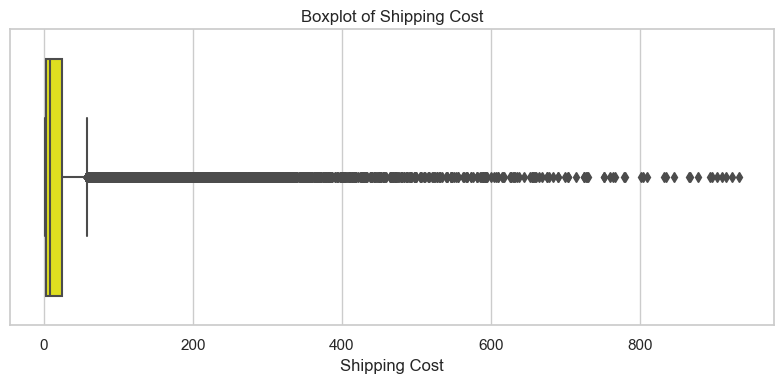

In [9]:
sns.set(style="whitegrid")

for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='yellow')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [10]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"{col}: Outliers capped between {lower_bound: .2f} and {upper_bound: .2f}")

Sales: Outliers capped between -299.68 and  581.50
Quantity: Outliers capped between -2.50 and  9.50
Discount: Outliers capped between -0.30 and  0.50
Profit: Outliers capped between -55.22 and  92.03
Shipping Cost: Outliers capped between -30.15 and  57.21


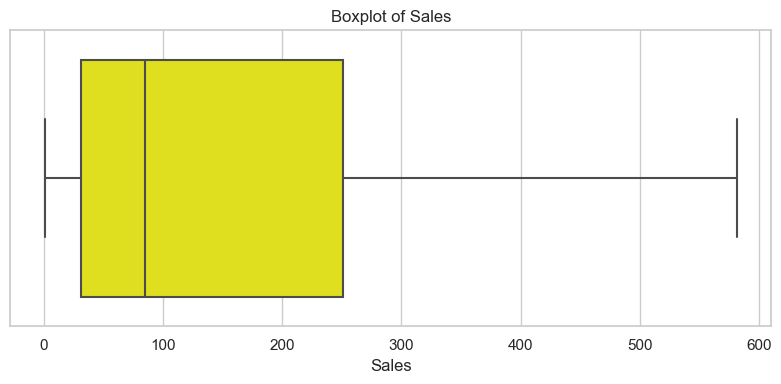

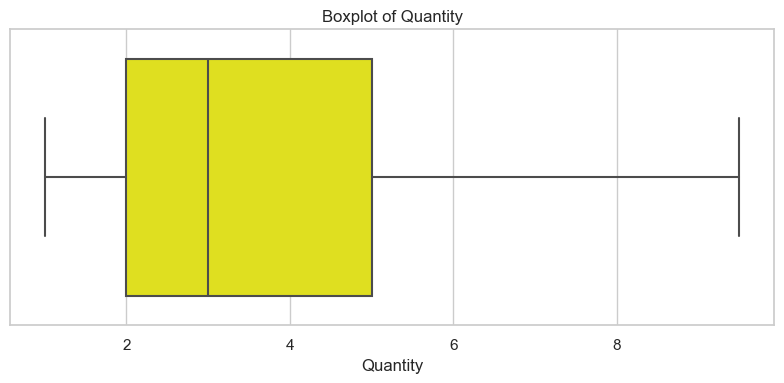

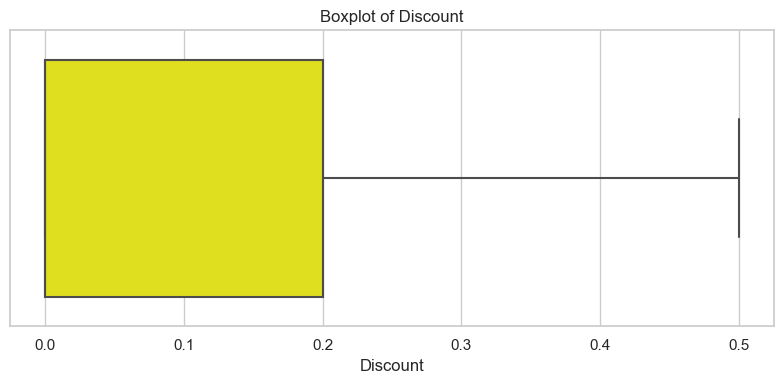

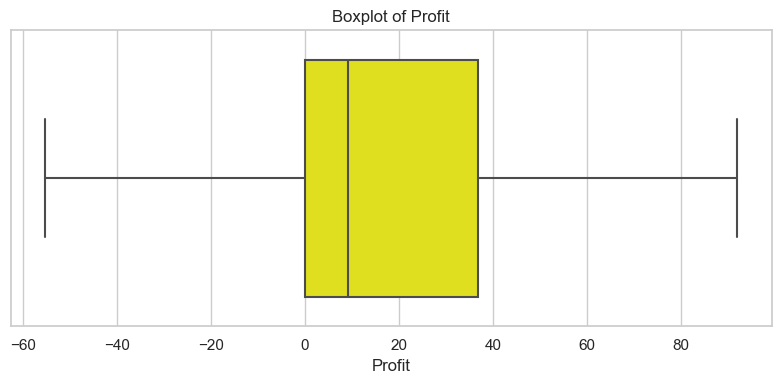

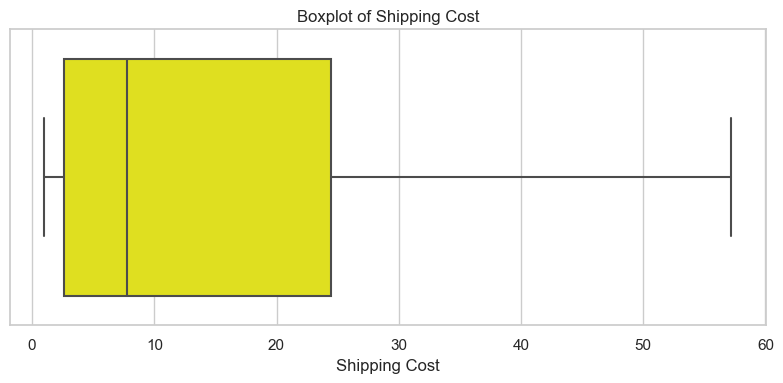

In [11]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='yellow')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [12]:
print("Skewness : ")
print(df.skew(numeric_only=True))
print("\n Kurtosis : ")
print(df.kurtosis(numeric_only=True))

Skewness : 
Sales            1.196812
Quantity         0.991105
Discount         1.088664
Profit           0.361313
Shipping Cost    1.211563
dtype: float64

 Kurtosis : 
Sales            0.022668
Quantity         0.328319
Discount        -0.391058
Profit          -0.251654
Shipping Cost    0.022597
dtype: float64


In [13]:
df['Sales'] = np.log1p(df['Sales'])
df['Discount'] = np.log1p(df['Discount'])
df['Shipping Cost'] = np.log1p(df['Shipping Cost'])

print("\nSkewness after transformation:")
print(df[['Sales', 'Discount', 'Shipping Cost']].skew())


Skewness after transformation:
Sales           -0.183214
Discount         0.994344
Shipping Cost    0.256598
dtype: float64


In [14]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

In [15]:
df['Profit_Margin'] = df['Profit'] / (df['Sales'] + 1e-5)

In [16]:
df['Revenue per Item'] = df['Sales'] / df['Quantity']

In [17]:
df['High Discount Flag'] = df['Discount'].apply(lambda x: 1 if x > np.log1p(0.3) else 0)

In [18]:
engineered_numerical = ['Shipping Delay', 'Profit_Margin', 'Revenue per Item']
numerical_columns += engineered_numerical

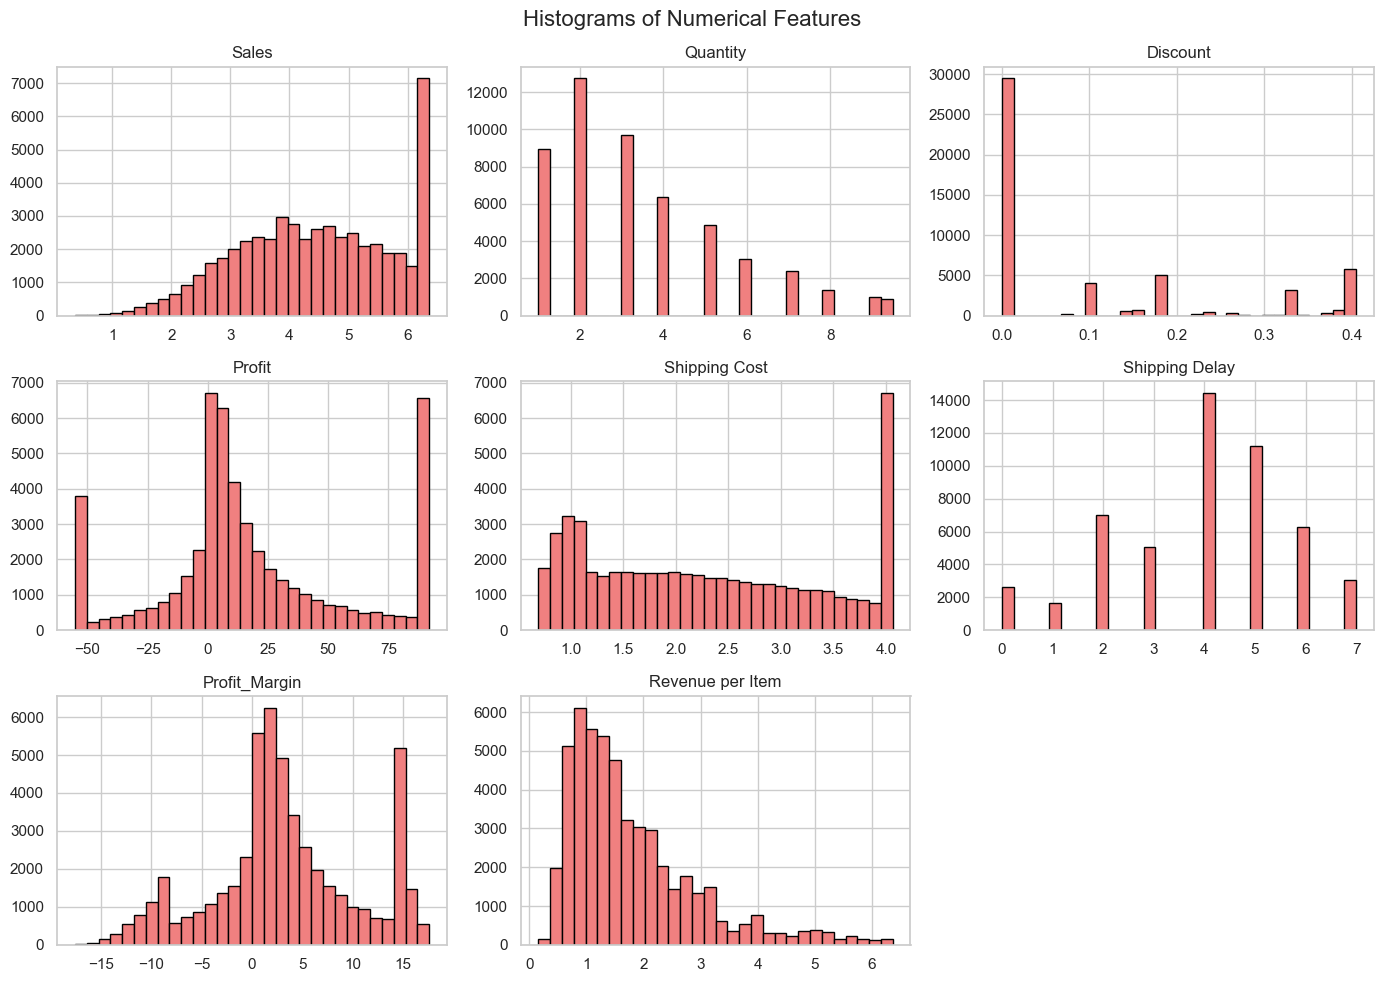

In [19]:
df[numerical_columns].hist(figsize=(14,10), bins=30, color='lightcoral', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
if 'High Discount Flag' not in categorical_columns:
    categorical_columns.append('High Discount Flag')

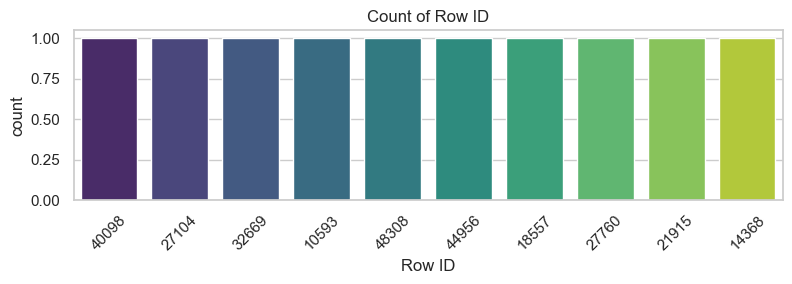

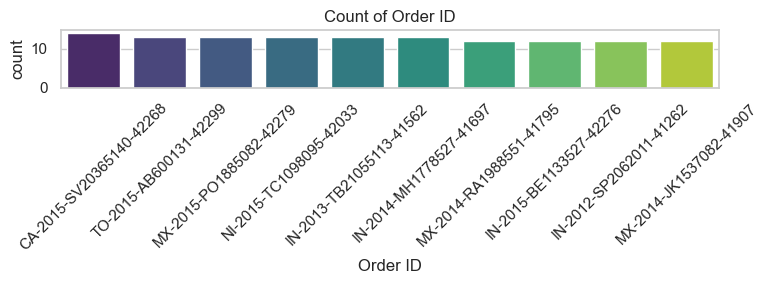

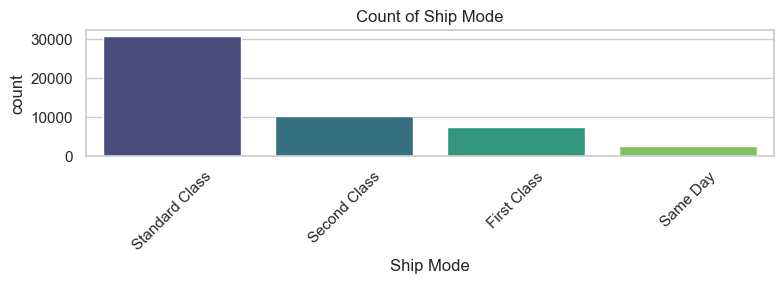

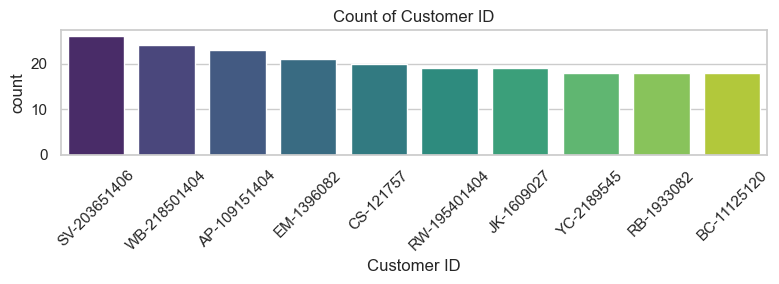

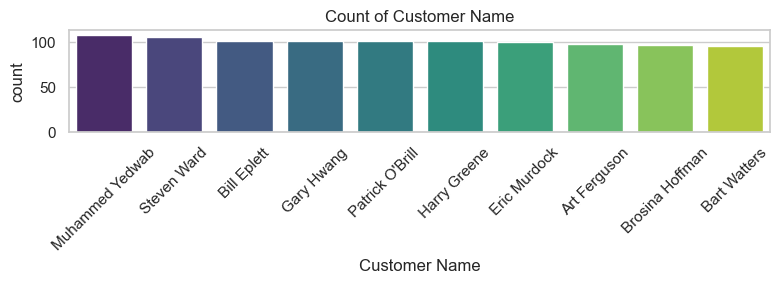

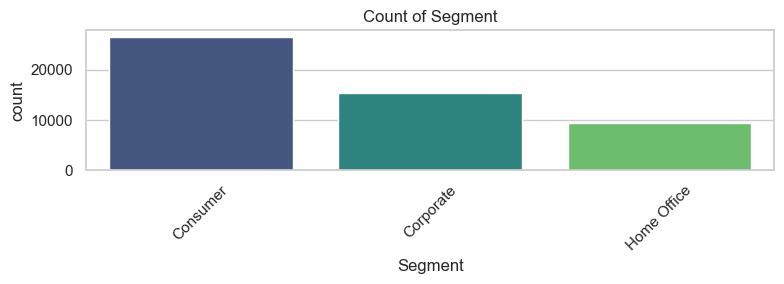

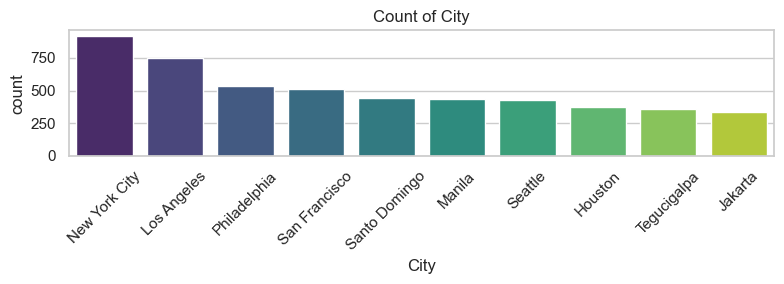

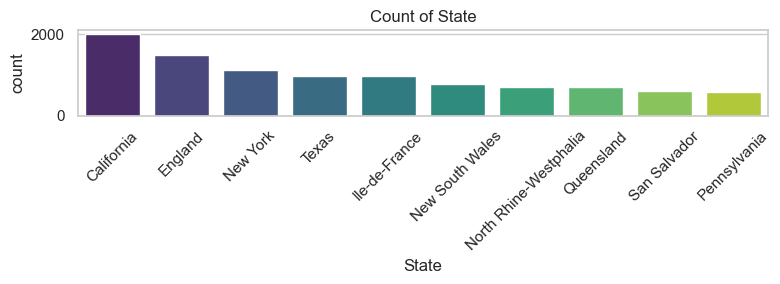

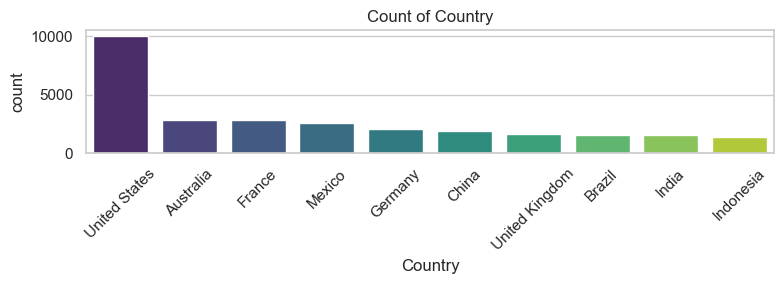

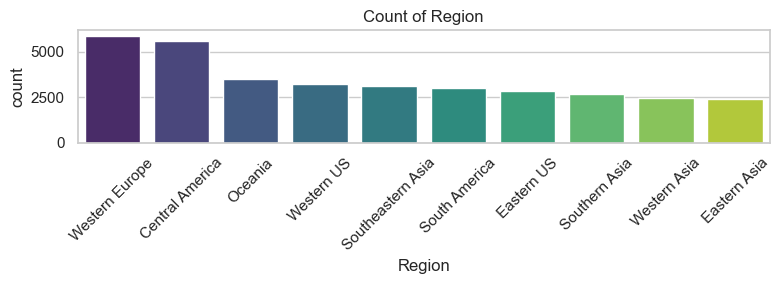

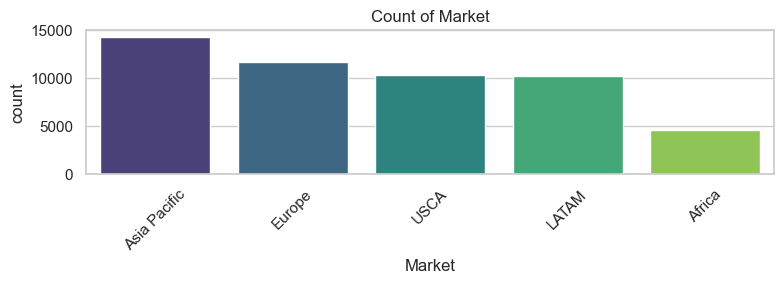

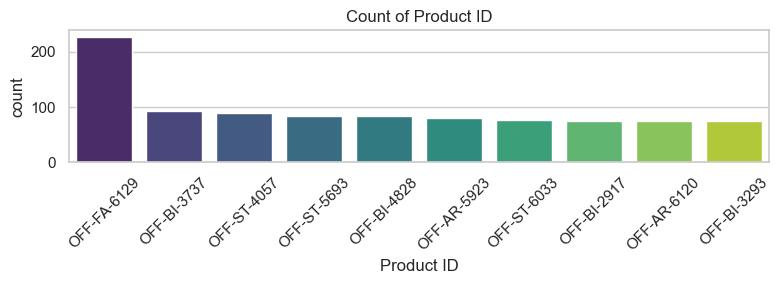

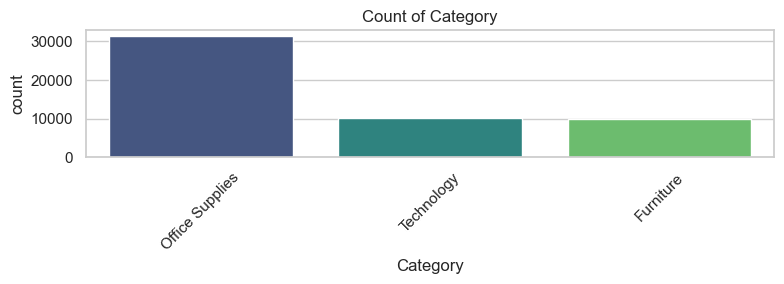

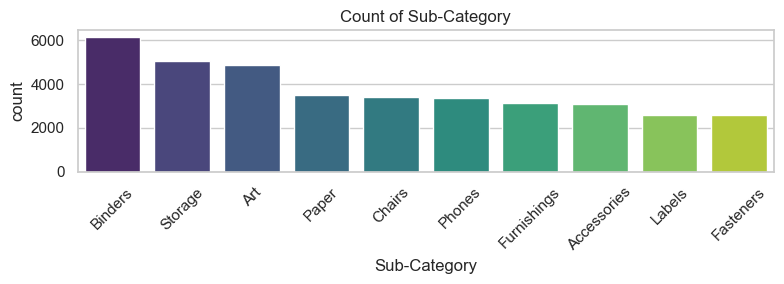

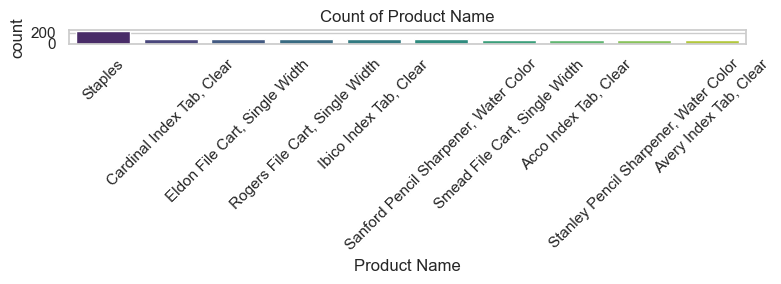

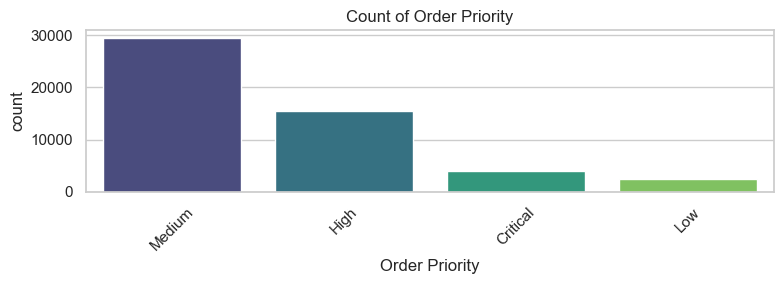

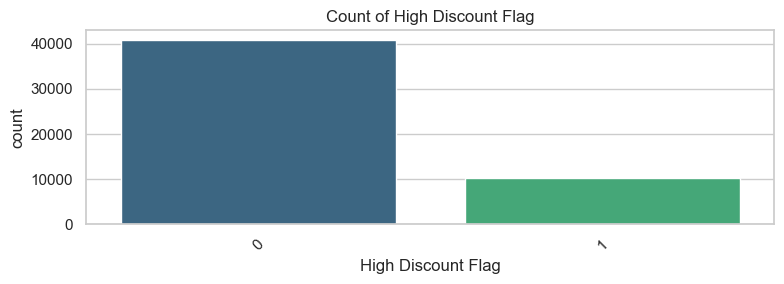

In [21]:
for col in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

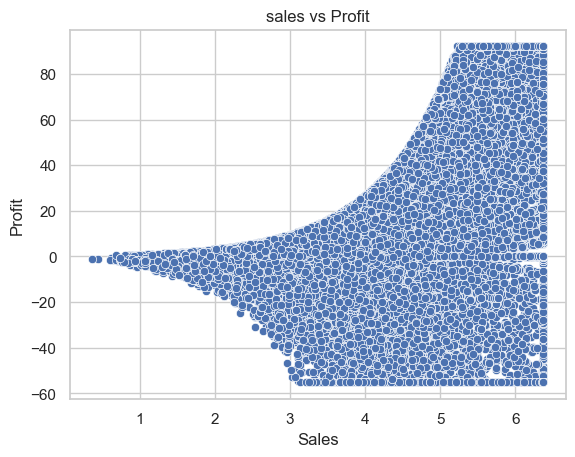

In [22]:
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title("sales vs Profit")
plt.show()

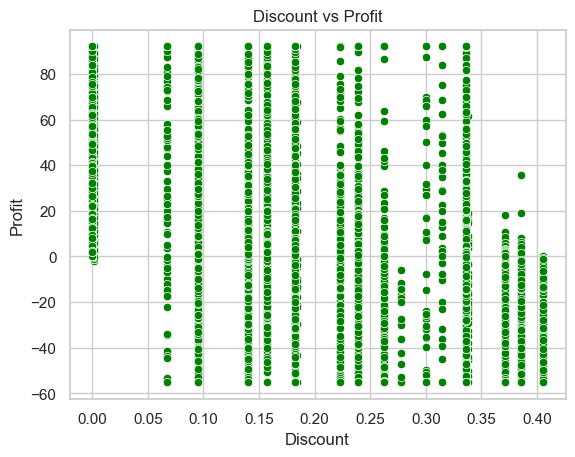

In [23]:
sns.scatterplot(data=df, x='Discount', y='Profit', color='green')
plt.title("Discount vs Profit")
plt.show()

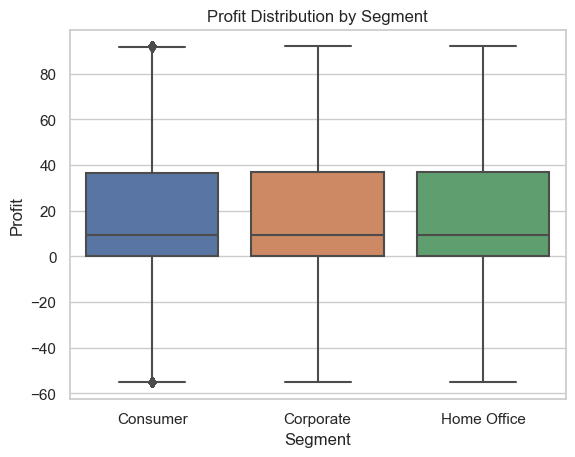

In [24]:
sns.boxplot(data=df, x='Segment', y='Profit')
plt.title("Profit Distribution by Segment")
plt.show()

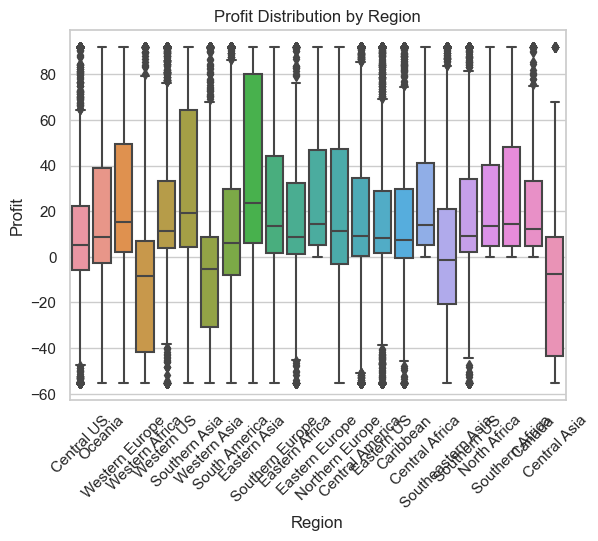

In [25]:
sns.boxplot(data=df, x='Region', y='Profit')
plt.title("Profit Distribution by Region")
plt.xticks(rotation=45)
plt.show()

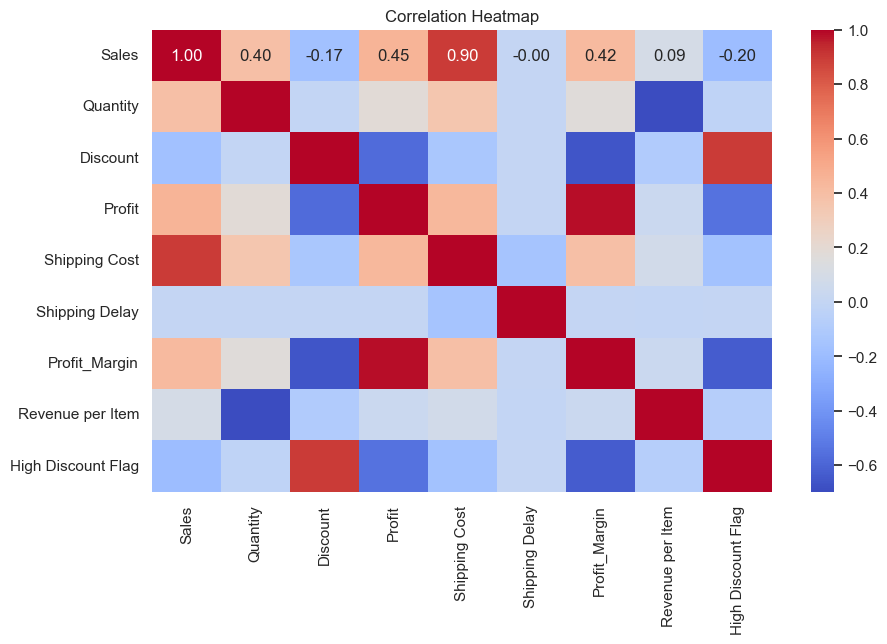

In [26]:
corr_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
pip install sqlalchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sqlalchemy import create_engine

user = 'root'
password = '04082006'
host = 'localhost'
port = '3306'
database = 'global_superstore'

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')

df.to_sql('superstore_data_cleaned', con=engine, if_exists='replace', index=False)

print("Data exported to MySQL successfully")

Data exported to MySQL successfully
